## Data Cleaning and Labeling

In [1]:

import pandas as pd 
import numpy as np

In [2]:
%cd ..

d:\Fake_news_detector


In [3]:
# df1 for Climatechange Feedback website
# df2 for PoliticFace website
df1 = pd.read_csv('datasets\climatefeedback.csv')
df2 = pd.read_csv('datasets\politicfact.csv')

In [4]:
labels1 = []
for i in df1['class']:
    labels1.append(i.split('/')[-1])

df1['labels'] = labels1

In [5]:
df1.labels.value_counts()

labels
HTag_Inaccurate.png          56
HTag_Incorrect.png           51
HTag_Misleading.png          16
HTag_Unsupported.png         10
HTag_Flawed_Reasoning.png     9
HTag_Accurate.png             5
HTag_Mostly_Accurate.png      3
HTag_Mostly_Correct.png       3
HTag_Imprecise.png            2
HTag_Lacks_Context.png        2
HTag_Correct.png              2
HTag_Correct_But.png          1
Name: count, dtype: int64

In [6]:
for i in range(0,len(labels1)):
    if labels1[i] == "HTag_Incorrect.png":
        labels1[i] = 0
    elif labels1[i] == "HTag_Inaccurate.png"or labels1[i] == "HTag_Imprecise.png" or labels1[i]== "HTag_Lacks_Context.png":
        labels1[i] = 1
    elif labels1[i] == "HTag_Misleading.png" or labels1[i] == "HTag_Unsupported.png":
        labels1[i] = 2
    elif labels1[i] == "HTag_Flawed_Reasoning.png" or labels1[i] == "HTag_Imprecise.png ":
        labels1[i] = 3
    elif labels1[i] == "HTag_Correct.png" or labels1[i] == "HTag_Correct_But.png" or labels1[i] == "HTag_Mostly_Correct.png" or labels1[i] == "HTag_Mostly_Accurate.png" or labels1[i] == "HTag_Accurate.png":
        labels1[i] = 4

df1['labels'] = labels1

In [7]:
df1.labels.value_counts()

labels
1    60
0    51
2    26
4    14
3     9
Name: count, dtype: int64

In [8]:
labels2 = []
for i in df2['class']:
    labels2.append(i.split('/')[-2])

df2['labels'] = labels2

In [9]:
df2.labels.value_counts()

labels
meter-false           1897
meter-mostly-false    1855
meter-half-true       1623
meter-mostly-true     1320
meter-true             849
tom_ruling_pof         685
meter-full-flop        153
meter-half-flip         73
meter-no-flip           22
Name: count, dtype: int64

In [10]:
for i in range(0,len(labels2)):
    if labels2[i] == "meter-false" or labels2[i]=="tom_ruling_pof":
        labels2[i] = 0
    elif labels2[i] == "meter-mostly-false":
        labels2[i] = 1
    elif labels2[i] == "meter-half-true":
        labels2[i] = 2
    elif labels2[i] == "meter-mostly-true":
        labels2[i] = 3
    elif labels2[i] == "meter-true":
        labels2[i] = 4
    elif labels2[i] == "meter-no-flip" or labels2[i] == "meter-half-flip" or labels2[i] == "meter-full-flop":
        labels2[i] = ''
df2['labels'] = labels2

In [11]:
df2.labels.value_counts()

labels
0    2582
1    1855
2    1623
3    1320
4     849
      248
Name: count, dtype: int64

In [12]:
df2 = df2[df2.labels != '']

In [13]:
df2.labels.value_counts()

labels
0    2582
1    1855
2    1623
3    1320
4     849
Name: count, dtype: int64

In [14]:
df1.columns

Index(['Unnamed: 0', 'title', 'news', 'class', 'review', 'labels'], dtype='object')

In [15]:
df2.columns

Index(['Unnamed: 0', 'news', 'class', 'labels'], dtype='object')

In [16]:
df1.drop(['Unnamed: 0','title','review','class'],axis=1,inplace=True)
df2.drop(['Unnamed: 0','class'],axis=1,inplace=True)

In [17]:
df1.head()

,news,labels
0,\nMagnetic poles reversals involve the Earth f...,0
1,\n“We have been cooling down for the past 4000...,1
2,\nAntarctic sea-ice extent is increasing to re...,1
3,\nChemtrails contain toxic substances such as ...,1
4,\nClimate changed naturally in prehistoric era...,3


In [18]:
df2.head()

,news,labels
0,Donald Trump is an “affirmative action advocate.”,1
1,Video suggests COVID-19 vaccines are responsib...,0
2,"NASA warns of “internet apocalypse,” which “me...",0
3,Kevin McCarthy “announces impeachment proceedi...,0
4,“Young Americans across this country are no lo...,2


In [19]:
print(len(df1)+len(df2))

8389


In [20]:
df = pd.concat([df1,df2])

In [21]:
df.labels.value_counts()

labels
0    2633
1    1915
2    1649
3    1329
4     863
Name: count, dtype: int64

In [22]:
df

,news,labels
0,\nMagnetic poles reversals involve the Earth f...,0
1,\n“We have been cooling down for the past 4000...,1
2,\nAntarctic sea-ice extent is increasing to re...,1
3,\nChemtrails contain toxic substances such as ...,1
4,\nClimate changed naturally in prehistoric era...,3
...,...,...
8472,"""(McCain) was opposed to ethanol. Now he's for...",3
8473,"""(McCain) said he was opposed to overturning R...",2
8474,"""He's leading by example, refusing contributio...",2
8475,"""Roadside bombs are responsible for 70 percent...",3


## Start Data Preprocessing and Building The Model

In [23]:
!pip install nlpaug

In [24]:
import nlpaug.augmenter.word as naw

aug = naw.SynonymAug(aug_src='wordnet')

# Text data augmentation

df_aug = aug.augment(list(df['news']))
df_2 = pd.DataFrame({'news':np.asarray(df_aug),'labels':np.asarray(df['labels'])})
df_copy = pd.concat([df,df_2])
df_aug = aug.augment(list(df_copy['news']))
df_2 = pd.DataFrame({'news':np.asarray(df_aug),'labels':np.asarray(df_copy['labels'])})
df_copy = pd.concat([df_copy,df_2])
df_aug = aug.augment(list(df_copy['news']))
df_2 = pd.DataFrame({'news':np.asarray(df_aug),'labels':np.asarray(df_copy['labels'])})
df_copy = pd.concat([df_copy,df_2])

news      33556
labels    33556
dtype: int64

In [25]:
# libraries help to clean texts 
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
def remove_english_stopwords(text):
    stop_words = stopwords.words('english')
    words = text.split()
    filtered_sentence = ''
    for word in words:
        if word not in stop_words:
            filtered_sentence = filtered_sentence + word + ' '
    return filtered_sentence

# Remove Punvtuation
def remove_punctuation(text):
    table = str.maketrans('','',string.punctuation)
    words = text.split()
    filtered_sentence = ''
    for word in words:
        word = word.translate(table)
        filtered_sentence = filtered_sentence + word + ' '
    return filtered_sentence

# Normalize Text
def normalize_english_text(text):
    text = text.lower()
    # get rid of urls
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # get rid of non words and extra spaces
    text = re.sub('\\W', ' ', text)
    text = re.sub('\n', '', text)
    text = re.sub(' +', ' ', text)
    text = re.sub('^ ', '', text)
    text = re.sub(' $', '', text)
    return text

def clean_english_text(text):
    text = text.lower()
    text = text.replace(',',' , ')
    text = text.replace('.',' . ')
    text = text.replace('/',' / ')
    text = text.replace('@',' @ ')
    text = text.replace('#',' # ')
    text = text.replace('?',' ? ')
    text = normalize_english_text(text)
    text = remove_punctuation(text)
    text = remove_english_stopwords(text)
    return text


In [27]:
df_copy['news'] = df_copy['news'].apply(clean_english_text)

In [28]:
# important libraries for deep learning
import tensorflow as tf 
from tensorflow import keras
# for tokenizing texts
from tensorflow.keras.preprocessing.text import Tokenizer
# for text padding and truncating
from tensorflow.keras.utils import pad_sequences
# to split datasets
from sklearn.model_selection import train_test_split

# one hot encoding 
from sklearn.preprocessing import OneHotEncoder

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_copy["news"]
                                                        , df_copy['labels']
                                                        , test_size=0.2,
                                                        random_state=42,
                                                        shuffle=True)

In [30]:
one = OneHotEncoder()
y_train = one.fit_transform(np.asarray(y_train).reshape(-1,1)).toarray()
y_test = one.transform(np.asarray(y_test).reshape(-1,1)).toarray()

In [32]:
import pickle
with open("pipeline/encoder", "wb") as f: 
    pickle.dump(one, f)

In [33]:
# important properties
vocab_size = 10000
max_length = 25

trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [34]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

In [35]:
#To Save conf execute this cell
#Save Tokenizer Configuration
import json 
import os 

tok_conf = tokenizer.to_json()
try:
    os.mkdir('tokenizer/')
except:
    print('Folder already there!')

with open('tokenizer/tok_conf.json', 'w') as outfile:
    outfile.write(json.dumps(tok_conf))

Folder already there!


In [36]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, maxlen=max_length,
                         padding=padding_type,
                         truncating=trunc_type)
X_test = pad_sequences(X_test, maxlen=max_length,
                         padding=padding_type,
                         truncating=trunc_type)


In [37]:
# for nn arch 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
def build_model():
    model = Sequential()

    model.add(Embedding(vocab_size, 64, input_length=max_length))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.2))  # Add dropout regularization

    model.add(LSTM(64))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))  # Add dropout regularization

    model.add(Dense(5, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=3)  # Apply early stopping

    return model, early_stopping

In [43]:
model, early_stopping = build_model()

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 64)            640000    
                                                                 
 lstm_2 (LSTM)               (None, 25, 64)            33024     
                                                                 
 dropout_2 (Dropout)         (None, 25, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                

In [45]:
history = model.fit(X_train,y_train,epochs=15,validation_split=.1,callbacks=[early_stopping])

Epoch 1/15
755/755 [==============================] - 29s 32ms/step - loss: 1.4591 - accuracy: 0.3564 - val_loss: 1.3835 - val_accuracy: 0.3955
Epoch 2/15
755/755 [==============================] - 22s 29ms/step - loss: 1.2396 - accuracy: 0.4700 - val_loss: 1.2866 - val_accuracy: 0.4749
Epoch 3/15
755/755 [==============================] - 25s 33ms/step - loss: 0.9986 - accuracy: 0.6032 - val_loss: 1.1970 - val_accuracy: 0.5337
Epoch 4/15
755/755 [==============================] - 27s 36ms/step - loss: 0.7746 - accuracy: 0.7032 - val_loss: 1.1331 - val_accuracy: 0.5862
Epoch 5/15
755/755 [==============================] - 28s 37ms/step - loss: 0.5699 - accuracy: 0.7882 - val_loss: 1.1739 - val_accuracy: 0.5959
Epoch 6/15
755/755 [==============================] - 26s 34ms/step - loss: 0.4371 - accuracy: 0.8410 - val_loss: 1.2297 - val_accuracy: 0.6119
Epoch 7/15
755/755 [==============================] - 25s 33ms/step - loss: 0.3410 - accuracy: 0.8781 - val_loss: 1.1624 - val_accuracy:

In [46]:
model.evaluate(np.asarray(X_test),np.asarray(y_test))

210/210 [==============================] - 2s 10ms/step - loss: 1.2750 - accuracy: 0.6238


[1.274977684020996, 0.6238080859184265]

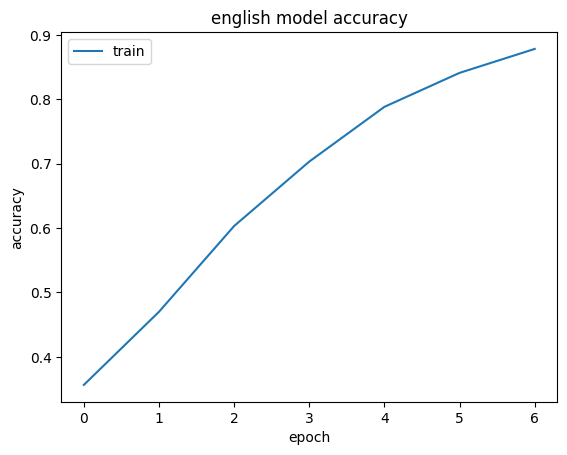

In [47]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('english model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
pred = model.predict(X_test)
pred = one.inverse_transform(pred)
test = one.inverse_transform(y_test)

210/210 [==============================] - 3s 9ms/step


In [49]:
test

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [2]], dtype=object)

In [50]:
pred

array([[0],
       [0],
       [1],
       ...,
       [3],
       [0],
       [3]], dtype=object)

[Text(0, 0.5, '0'), Text(0, 1.5, '1'), Text(0, 2.5, '2')]

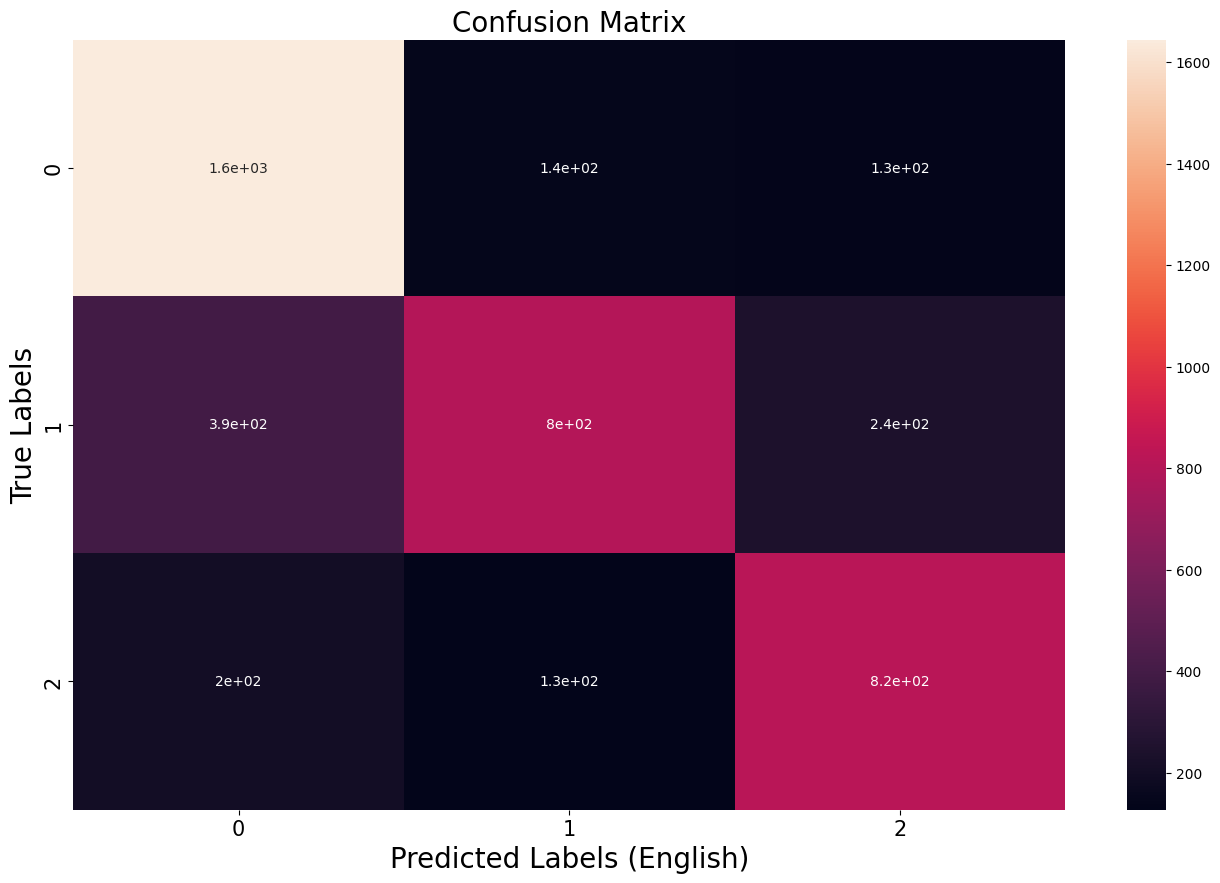

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


matrix = confusion_matrix(test.astype('int'),pred.astype('int'), labels=[0,1,2])
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels (English)', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1,2], size=15)
ax.yaxis.set_ticklabels([0,1,2], size=15)

In [ ]:
model.save('models/checkpoint_01.h5')